In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('Breast_cancer_data.csv')
df.head(7)

Saving Breast_cancer_data.csv to Breast_cancer_data.csv


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0


In [ ]:
df.shape

(569, 6)

In [ ]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
df=df.dropna(axis=1)

In [ ]:
df.shape

(569, 6)

In [ ]:
df['mean_radius'].value_counts()

mean_radius
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64

<Axes: ylabel='count'>

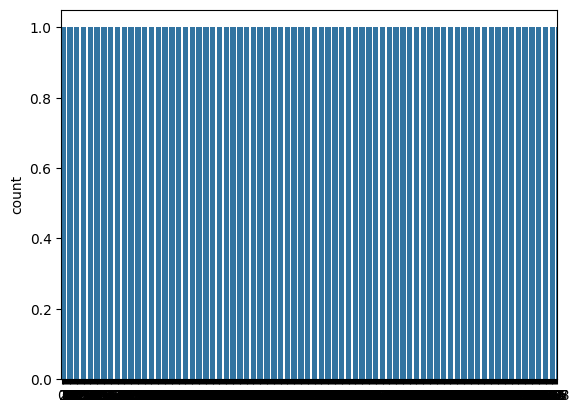

In [ ]:
sns.countplot(df['diagnosis'], label='count')

In [ ]:
df.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)


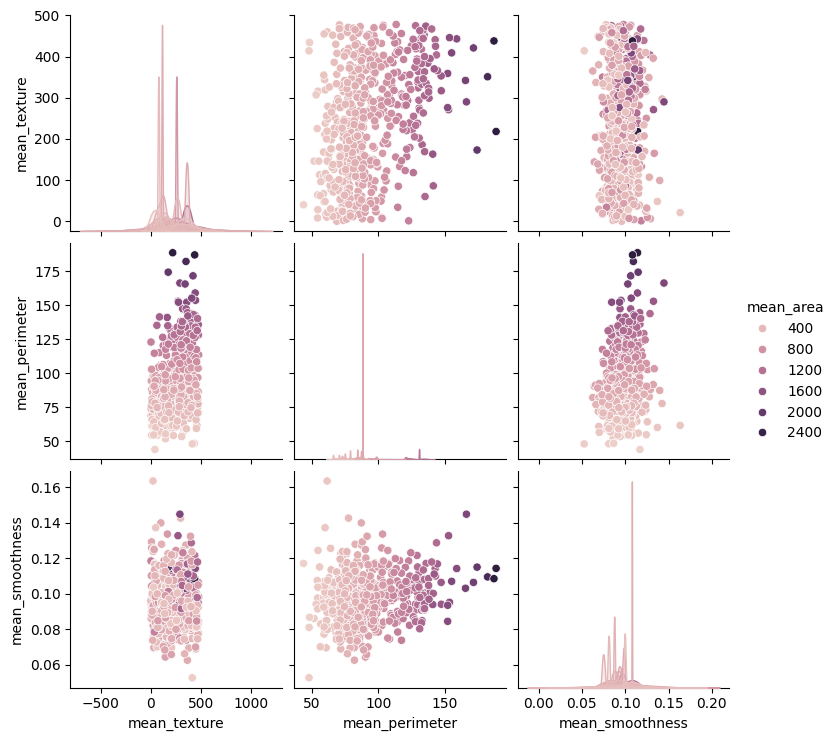

In [ ]:
sns.pairplot(df.iloc[:,1:5], hue='mean_area')

In [ ]:
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,1.0,122.80,1001.0,0.11840,0
1,20.57,186.0,132.90,1326.0,0.08474,0
2,19.69,324.0,130.00,1203.0,0.10960,0
3,11.42,297.0,77.58,386.1,0.14250,0
4,20.29,60.0,135.10,1297.0,0.10030,0


In [ ]:
df.iloc[:,1:12].corr()

,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_texture,1.000000,0.355830,0.345076,0.002182,-0.458623
mean_perimeter,0.355830,1.000000,0.986507,0.207278,-0.742636
mean_area,0.345076,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.002182,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.458623,-0.742636,-0.708984,-0.358560,1.000000


In [ ]:
df.iloc[:,1:12].corr()

,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_texture,1.000000,0.355830,0.345076,0.002182,-0.458623
mean_perimeter,0.355830,1.000000,0.986507,0.207278,-0.742636
mean_area,0.345076,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.002182,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.458623,-0.742636,-0.708984,-0.358560,1.000000


<Axes: >

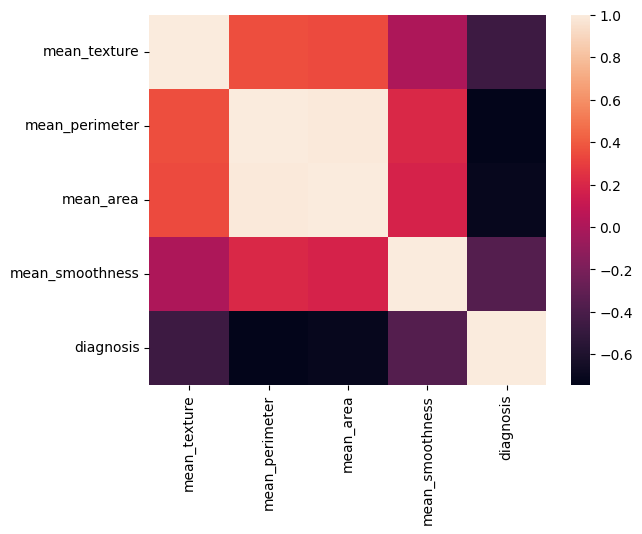

In [ ]:
sns.heatmap(df.iloc[:,1:12].corr())

<Axes: >

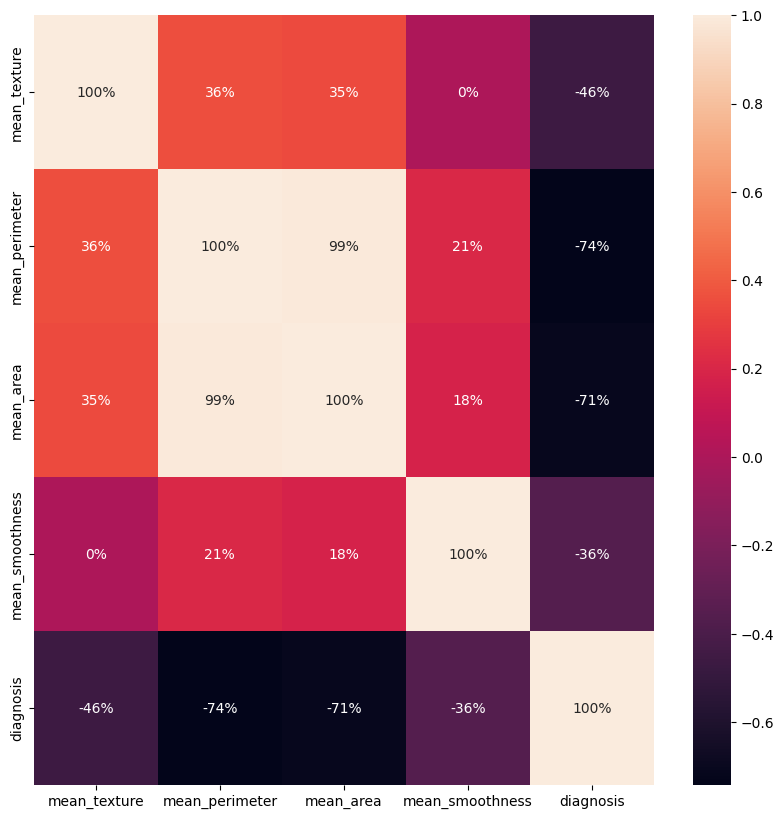

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%')

In [ ]:
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[-0.68024847, -0.62698309, -0.91381897,  0.7716901 ],
       [-0.82773762, -0.75309358,  0.65281216,  0.7716901 ],
       [ 1.60009756,  1.67383892,  0.10362413, -1.29585697],
       ...,
       [-1.3242844 , -1.05503654,  0.32763504,  0.7716901 ],
       [-1.28700242, -1.02864778, -1.94137868,  0.7716901 ],
       [-0.72203706, -0.7080938 , -0.27141349,  0.7716901 ]])

In [ ]:
def models(X_train, Y_train):
  from sklearn.linear_model import LogisticRegression #Fixed typo
  log=LogisticRegression(random_state=0)
  log=LogisticRegression(random_state=0) #Fixed typo here
  log.fit(X_train, Y_train)
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, Y_train)
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train, Y_train) #Fixed typo here
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  return log, tree, forest

In [ ]:
model=models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.03990610328638498
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9835680751173709


In [ ]:
from sklearn.metrics import confusion_matrix
for i in range( len(model) ):
  print('Model ', i)
  cm=confusion_matrix(Y_test, model[i].predict(X_test))
  TP=cm[0][0]
  TN=cm[1][1]
  FN=cm[1][0]
  FP=cm[0][1]
  print(cm)
  print('Testing Accuracy = ', (TP+TN)/(TP+TN+FN+FP))
  print()


Model  0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Accuracy =  nan

Model  1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Accuracy =  nan

Model  2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Testing Accuracy =  nan



<ipython-input-54-03f0aabc8736>:10: RuntimeWarning: invalid value encountered in scalar divide
  print('Testing Accuracy = ', (TP+TN)/(TP+TN+FN+FP))
<ipython-input-54-03f0aabc8736>:10: RuntimeWarning: invalid value encountered in scalar divide
  print('Testing Accuracy = ', (TP+TN)/(TP+TN+FN+FP))
<ipython-input-54-03f0aabc8736>:10: RuntimeWarning: invalid value encountered in scalar divide
  print('Testing Accuracy = ', (TP+TN)/(TP+TN+FN+FP))


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('Model ', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()


Model  0
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00       1.0
         5.0       0.00      0.00      0.00       1.0
         6.0       0.00      0.00      0.00       1.0
         9.0       0.00      0.00      0.00       1.0
        10.0       0.00      0.00      0.00       1.0
        13.0       0.00      0.00      0.00       1.0
        15.0       0.00      0.00      0.00       1.0
        16.0       0.00      0.00      0.00       1.0
        17.0       0.00      0.00      0.00       1.0
        21.0       0.00      0.00      0.00       1.0
        24.0       0.00      0.00      0.00       2.0
        25.0       0.00      0.00      0.00       1.0
        26.0       0.00      0.00      0.00       1.0
        28.0       0.00      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        44.0       0.00      0.00      0.00       1.0
        48.0       0.00      0.00      0.00       0.0
        50.0      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
pred=model[2].predict(X_test)
print(pred)
print()
print(Y_test)

[ 48. 457. 159. 447.  20.  65. 115.  20. 414.  95.   7.  70. 455.  34.
 341. 165.   8. 384. 427.  60.  68. 330. 237.  20. 353. 322. 408. 154.
 350. 327.  38. 383. 368. 188. 110.  37. 339. 475. 246. 276.  23. 200.
 403. 452. 339. 353. 307.  22. 284. 341. 464. 375. 327. 401. 215.  78.
 468.  54.  18. 276. 412. 197.  79.  58. 282. 462. 366.  85. 384. 168.
  43. 308.  65. 358. 233. 173. 316. 108. 412. 316. 232. 366. 308.  19.
 107. 365. 130. 434. 156. 366. 168. 358.  23.   7. 168.  30. 293. 117.
  20. 315.   8. 193. 379.  89. 356.  48.   1.  37. 403. 456.  37. 323.
 426. 122. 151.  88. 107. 185.  55. 339. 342. 225. 336. 234. 305. 410.
 345.  27. 452.  75. 175. 198. 339. 348. 372. 237.  70. 381. 276. 298.
 347.  48. 324.]

[299. 431. 103. 204. 216. 226. 380. 247. 435.  71.  50. 406. 343. 260.
  91.   9. 238. 453. 389. 395. 229. 231.  52. 240.  86.   5.  24. 378.
 150. 332.  26. 186. 309. 337.  10. 399. 153. 239. 149. 437. 470.  96.
 391. 131. 287. 370.  64. 324. 171. 451. 418. 389. 354. 214